# Implementing an Autoencoder

For autoencoders, we use a different network architecture, as shown in the following figure. In the first couple of layers, we decrease the number of hidden units. Halfway, we start increasing the number of hidden units again until the number of hidden units is the same as the number of input variables.
<br> 
The middle hidden layer can be seen as an encoded variant of the inputs, where the output determines the quality of the encoded variant 
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python-Deep-Learning-Cookbook/blob/master/data/deep_autoencoder.png?raw=true "Autoencoder"
In this example, we will implement an autoencoder in Keras to decode Street View House Numbers (SVHN) from 32 x 32images to 32 floating numbers. We can determine the quality of the encoder by decoding back to 32 x 32 and comparing the images.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io
import scipy
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


### Load data

In [2]:
# Data can be downloaded at http://ufldl.stanford.edu/housenumbers/

In [3]:
mat = scipy.io.loadmat('data/train_32x32.mat')
mat = mat['X']
b, h, d, n = mat.shape

### Preprocess the data

In [4]:
# Grayscale
img_gray = np.zeros(shape =(n, b * h))

def rgb2gray(rgb):    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for i in range(n):
    #Convert to greyscale
    img = rgb2gray(mat[:,:,:,i])
    img = img.reshape(1, 1024)
    img_gray[i,:] = img

# Normalize
X_train = img_gray/255.

### Define the autoencoder network architecture

In [5]:
img_size = X_train.shape[1]
model = Sequential()
model.add(Dense(256, input_dim=img_size, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(img_size, activation='sigmoid'))

opt = Adam()
model.compile(loss='binary_crossentropy', optimizer=opt)

### Train the autencoder

In [6]:
n_epochs = 100
batch_size = 512

model.fit(X_train, X_train, epochs=n_epochs, batch_size=batch_size, shuffle=True, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/100
58605/58605 [==============================] - 9s 152us/step - loss: 0.6574 - val_loss: 0.6338
Epoch 2/100
58605/58605 [==============================] - 7s 113us/step - loss: 0.6318 - val_loss: 0.6291
Epoch 3/100
58605/58605 [==============================] - 7s 117us/step - loss: 0.6275 - val_loss: 0.6257
Epoch 4/100
58605/58605 [==============================] - 7s 125us/step - loss: 0.6259 - val_loss: 0.6254
Epoch 5/100
58605/58605 [==============================] - 7s 118us/step - loss: 0.6242 - val_loss: 0.6268
Epoch 6/100
58605/58605 [==============================] - 9s 146us/step - loss: 0.6232 - val_loss: 0.6224
Epoch 7/100
58605/58605 [==============================] - 8s 141us/step - loss: 0.6226 - val_loss: 0.6217
Epoch 8/100
58605/58605 [==============================] - 7s 125us/step - loss: 0.6217 - val_loss: 0.6209
Epoch 9/100
58605/58605 [==============================] - 8s 141us/step - loss: 0.6213 - val_

58605/58605 [==============================] - 8s 135us/step - loss: 0.6134 - val_loss: 0.6129
Epoch 77/100
58605/58605 [==============================] - 9s 146us/step - loss: 0.6134 - val_loss: 0.6129
Epoch 78/100
58605/58605 [==============================] - 8s 131us/step - loss: 0.6133 - val_loss: 0.6130
Epoch 79/100
58605/58605 [==============================] - 7s 115us/step - loss: 0.6132 - val_loss: 0.6129
Epoch 80/100
58605/58605 [==============================] - 7s 122us/step - loss: 0.6131 - val_loss: 0.6134
Epoch 81/100
58605/58605 [==============================] - 8s 135us/step - loss: 0.6131 - val_loss: 0.6126
Epoch 82/100
58605/58605 [==============================] - 9s 153us/step - loss: 0.6130 - val_loss: 0.6126
Epoch 83/100
58605/58605 [==============================] - 10s 171us/step - loss: 0.6130 - val_loss: 0.6127
Epoch 84/100
58605/58605 [==============================] - 9s 159us/step - loss: 0.6130 - val_loss: 0.6127
Epoch 85/100
58605/58605 [==============

### Performs autoencoder on the training set

In [7]:
pred = model.predict(X_train)

### Plot some of the original images and their decoded versions

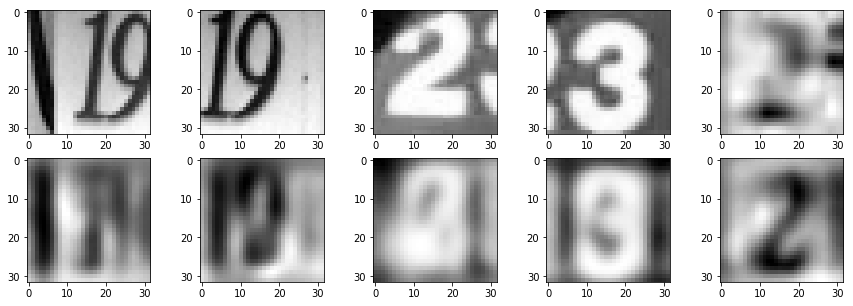

Example input and output of an autoencoder network for house numbers


In [10]:
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # plot original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_gray[i].reshape(32, 32), cmap='gray')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(32, 32), cmap='gray')
plt.show()
print ("Example input and output of an autoencoder network for house numbers")